In [1]:
# Load libraries
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn import tree

In [2]:
col_names = ['pregnant', 'glucose', 'bp', 'skin', 'insulin', 'bmi', 'pedigree', 'age', 'label']
# load dataset
pima = pd.read_csv("pima-indians-diabetes.csv", header=None, names=col_names)

In the context of the Pima Indians Diabetes dataset, "pregnant" refers to the number of times the subject has been pregnant. "Pedigree" refers to a measure of the subject's family history of diabetes, which is calculated as the sum of diabetes mellitus history in relatives and the age of onset for each relative, divided by the total number of relatives. This is a measure of the genetic susceptibility to diabetes in the subject's family.

In [3]:
pima.head()

,pregnant,glucose,bp,skin,insulin,bmi,pedigree,age,label
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
pima.shape

(768, 9)

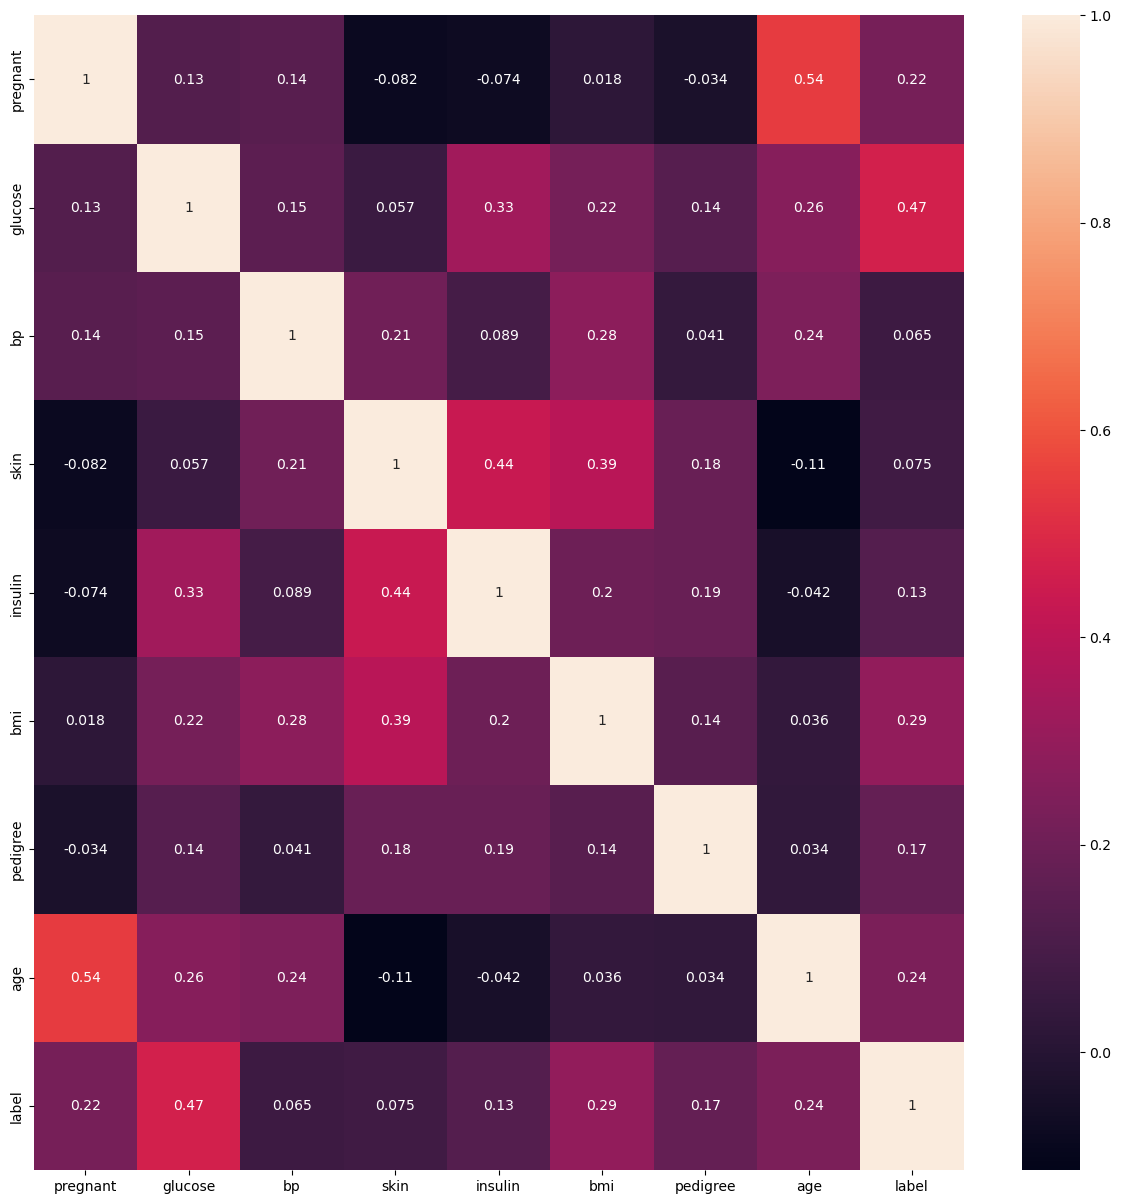

In [5]:
#Correlation Matrix
cm=pima.corr()
fig,ax = plt.subplots(figsize=(15,15))

ax=sns.heatmap(cm,annot=True)

In [6]:
#split dataset in features and target variable
feature_cols = ['pregnant', 'insulin', 'bmi', 'age','glucose','bp','pedigree']
X = pima[feature_cols] # Features
y = pima.label # Target variable

In [7]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1) # 70% training and 30% test

In [8]:
# Create Decision Tree classifer object
clf = DecisionTreeClassifier()

# Train Decision Tree Classifer
clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [9]:
# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.670995670995671


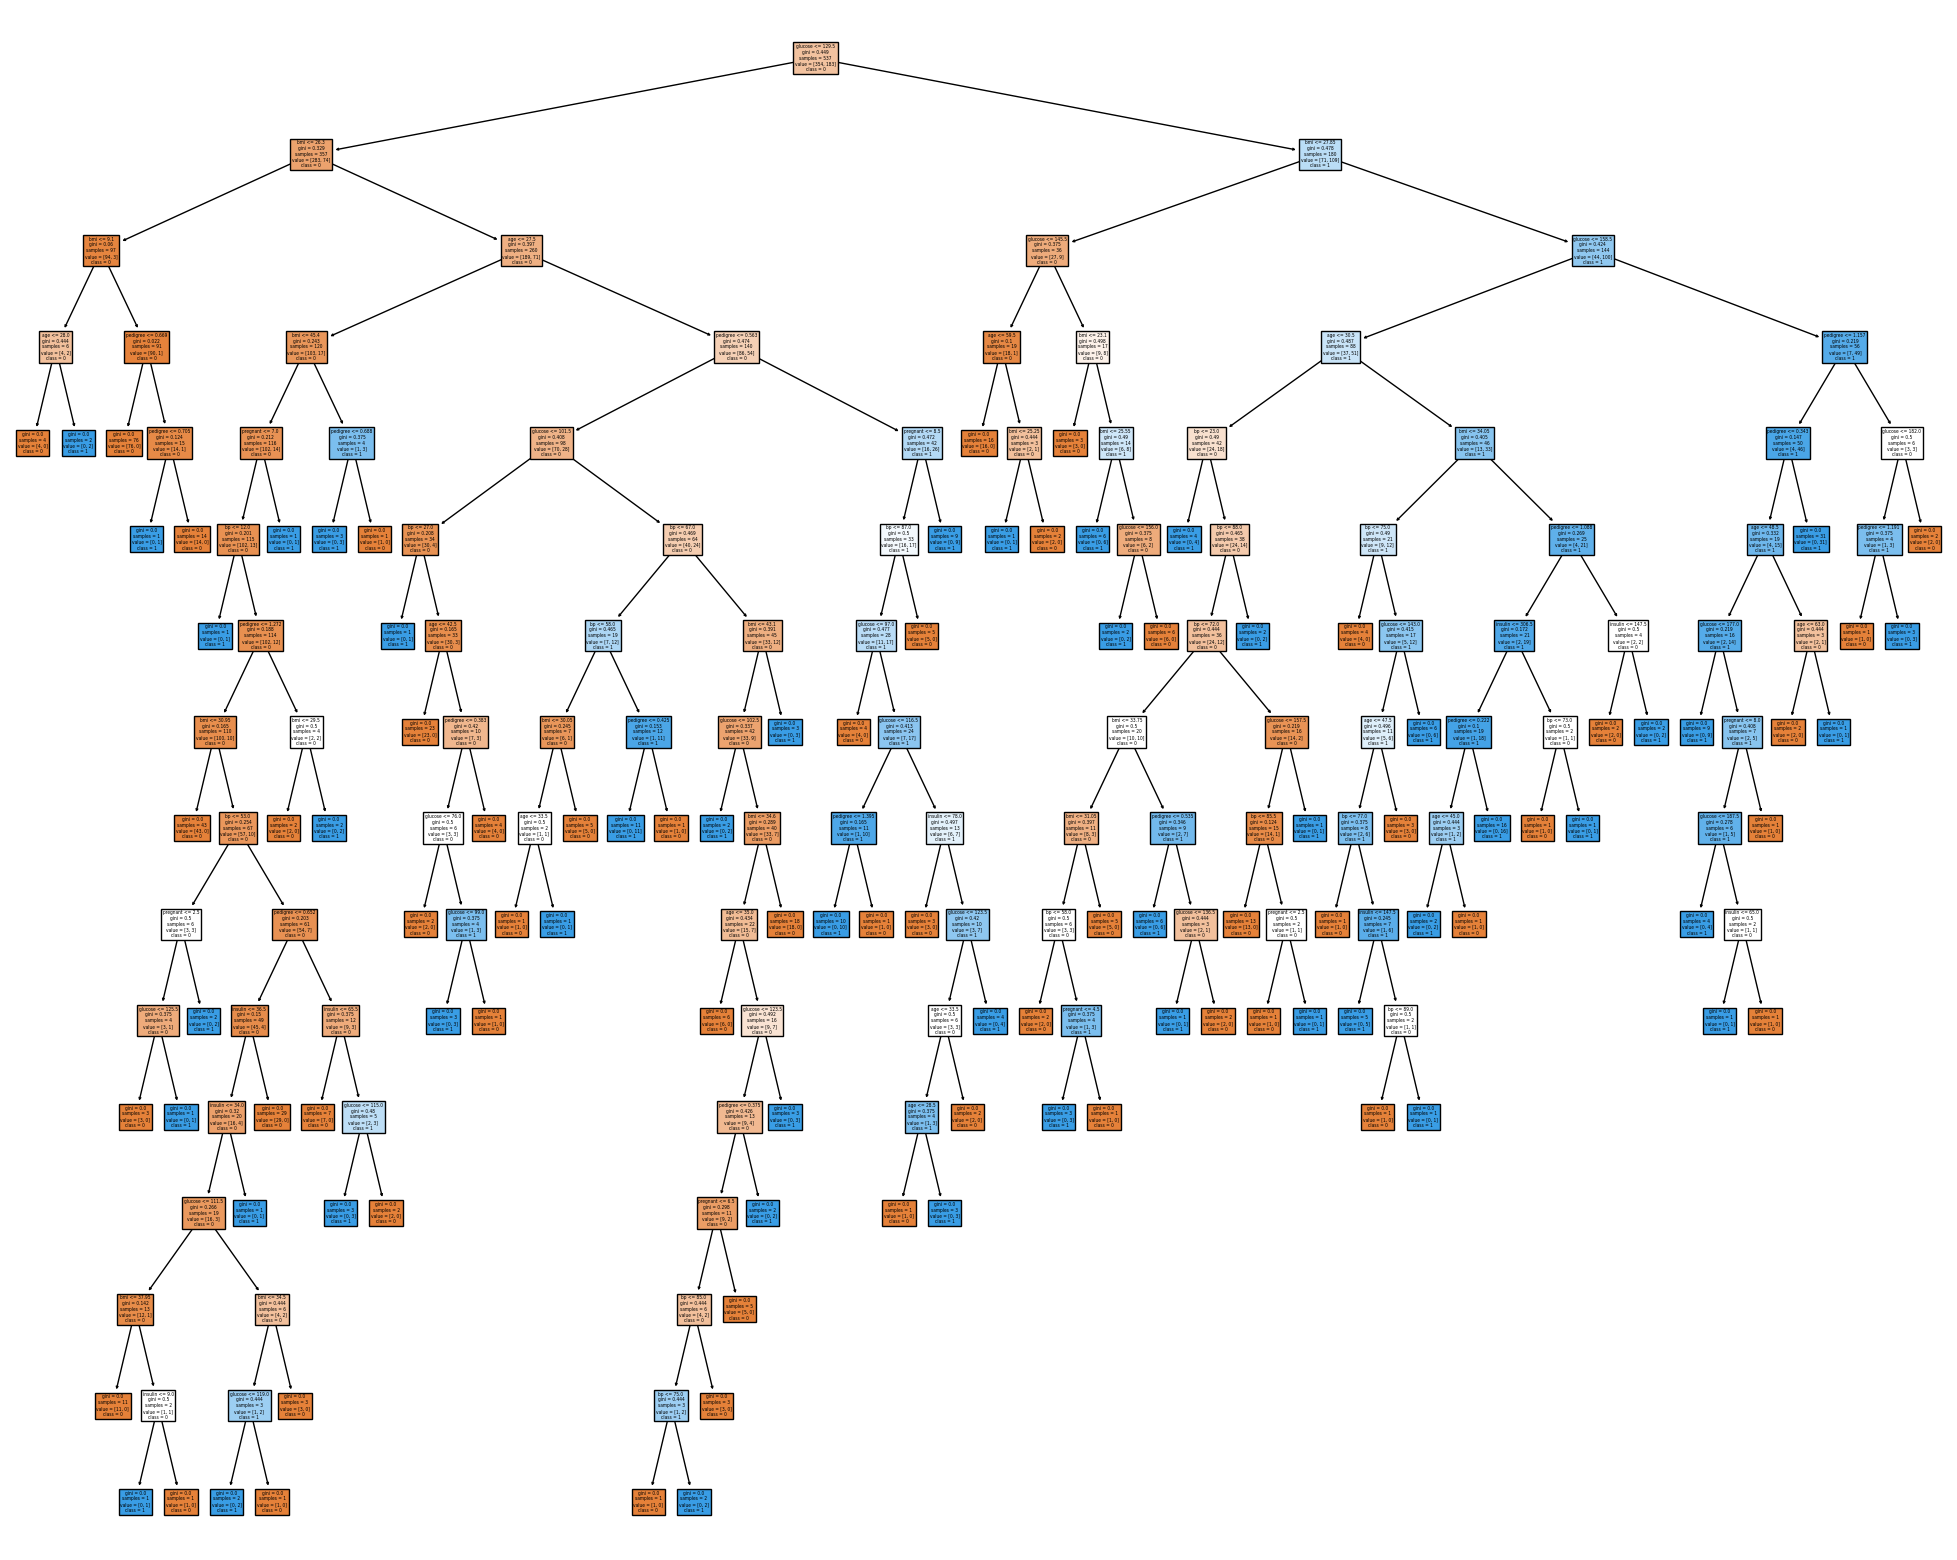

In [10]:

text_representation = tree.export_text(clf)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

The tree.export_text() function from the sklearn.tree module creates a textual representation of a decision tree. In the code above, the function is used to create the text representation of the decision tree classifier clf.

In [11]:
#Optimizing the Model
# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="entropy", max_depth=3)
# criterion : optional (default=”gini”) or Choose attribute selection measure. This parameter allows us to use the different-different attribute selection measure. Supported criteria are “gini” for the Gini index and “entropy” for the information gain.
# max_depth : int or None, optional (default=None) or Maximum Depth of a Tree. The maximum depth of the tree. If None, then nodes are expanded until all the leaves contain less than min_samples_split samples. The higher value of maximum depth causes overfitting, and a lower value causes underfitting (Source).

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

# Model Accuracy, how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.7705627705627706


Entropy is a measure of the impurity of the node and is used to determine the split points in the decision tree. Generally, lower entropy values are preferred as they represent a greater level of purity in the node. However, a too low entropy value may result in overfitting and a too high entropy value may result in underfitting.

Max_depth determines the maximum depth of the tree. It is important to set this value appropriately to avoid overfitting or underfitting. A too shallow tree may underfit the data, whereas a too deep tree may overfit the data.

Accuracy measures how well the model can predict the correct class labels of the test set. It is important to choose the right evaluation metric for the problem being solved, as accuracy may not be appropriate for imbalanced datasets where one class is more prevalent than the other.

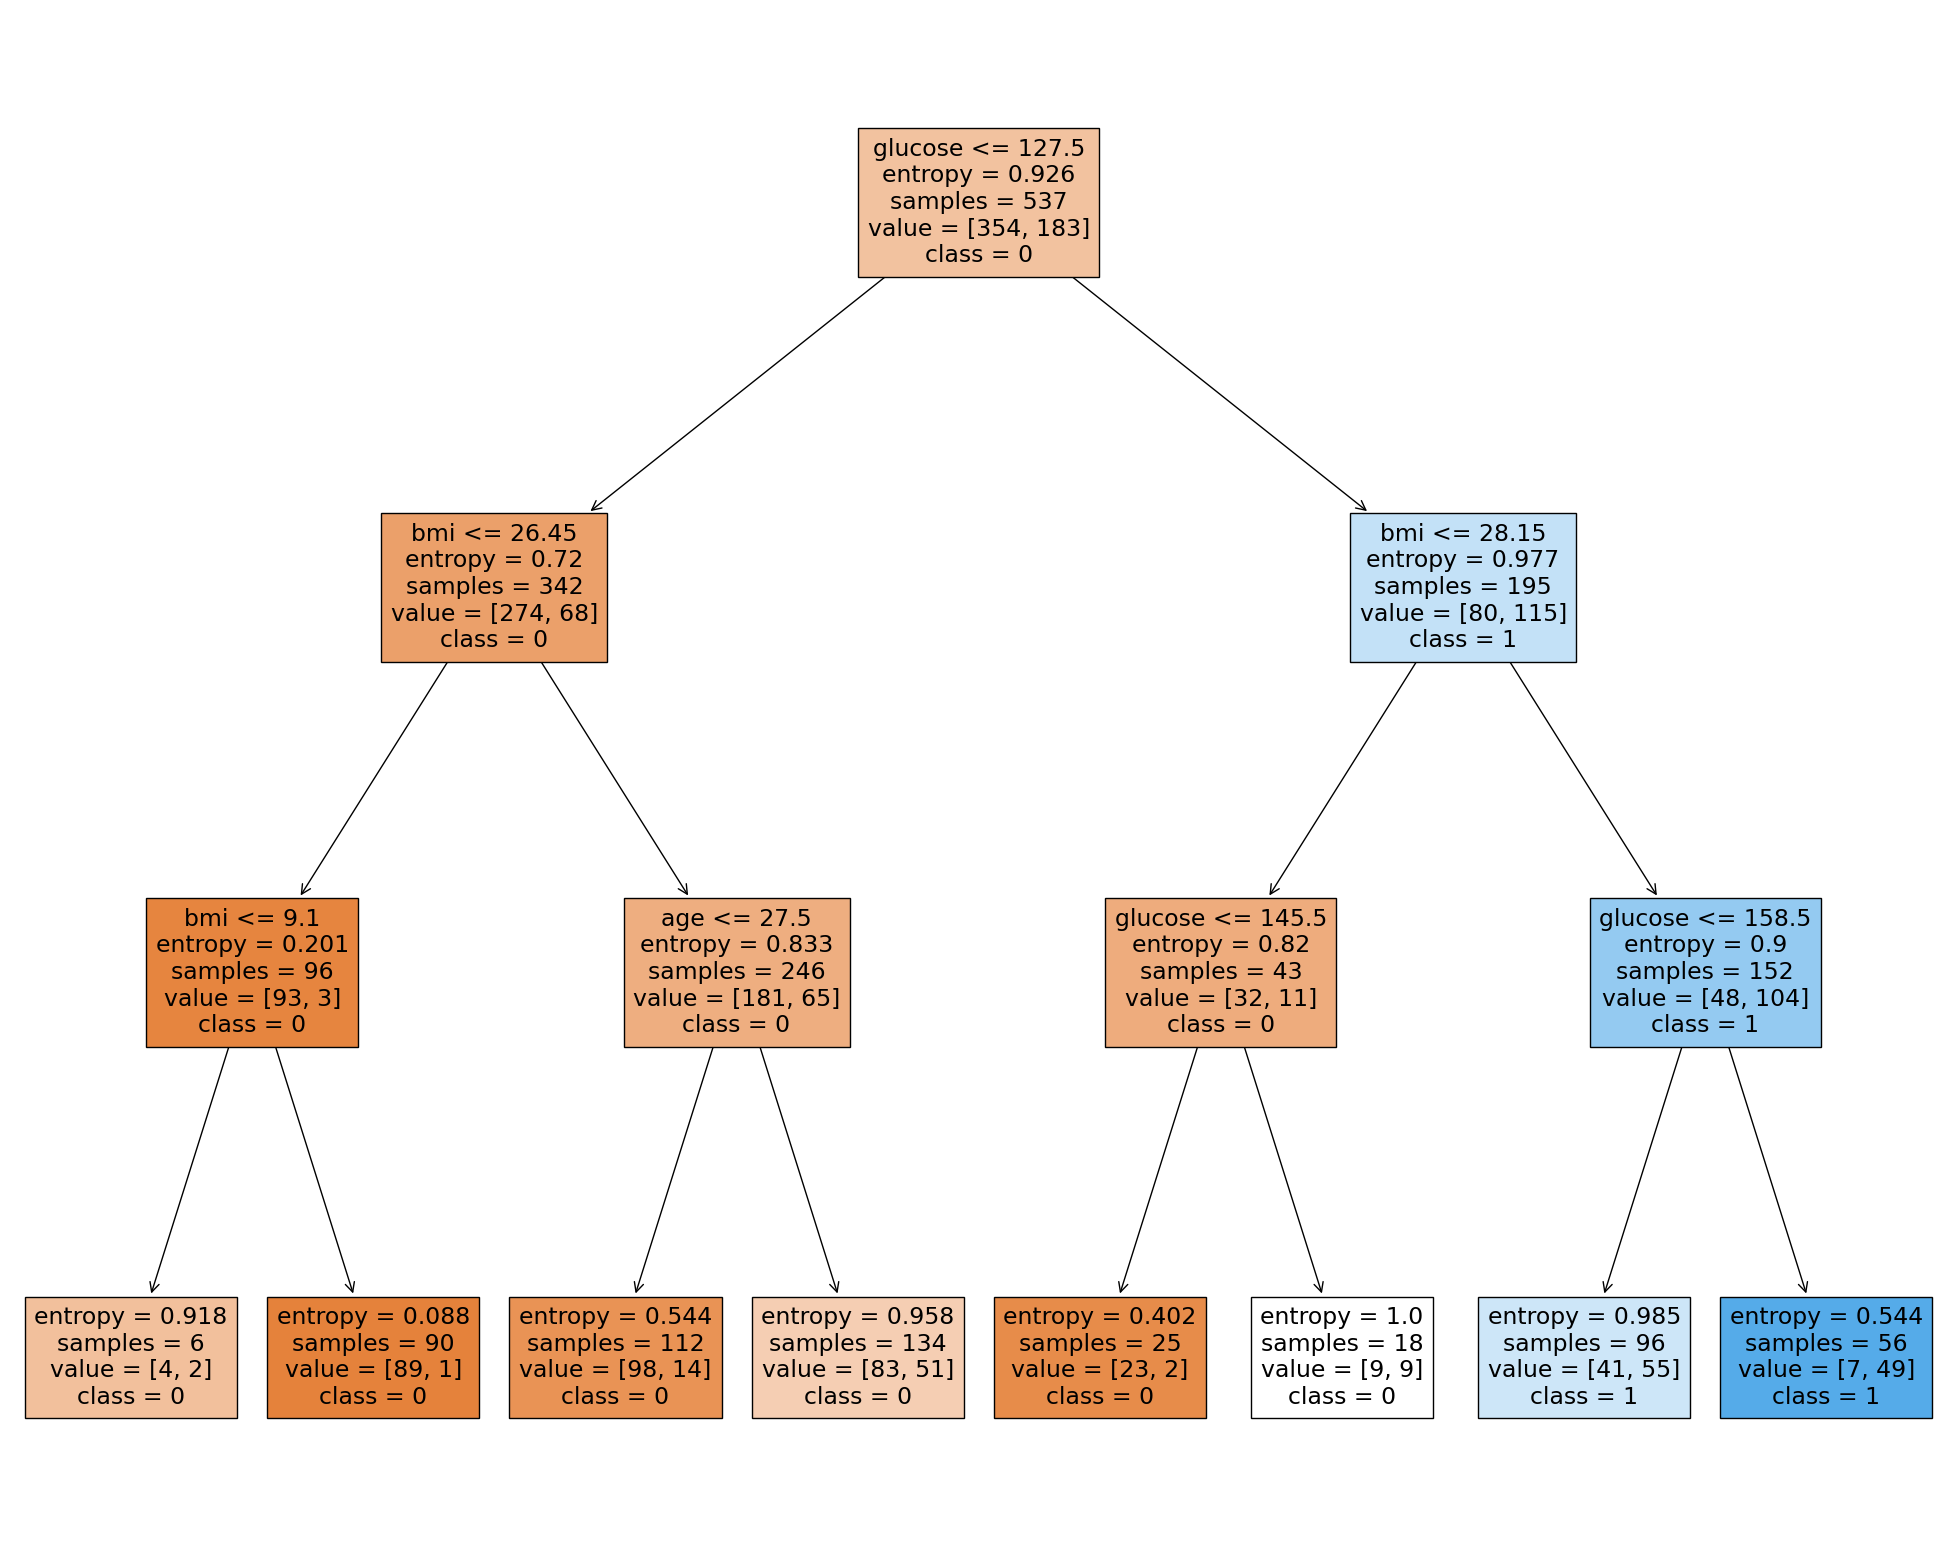

In [12]:
from matplotlib import pyplot as plt
from sklearn import tree
# if you want to save the tree...
text_representation = tree.export_text(clf)
with open("decistion_tree.log", "w") as fout:
    fout.write(text_representation)
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(clf, 
                   feature_names=feature_cols,  
                   class_names=['0','1'],
                   filled=True)

The optimal values of entropy, max_depth, and accuracy are determined through a process of hyperparameter tuning, where different values of these parameters are tried and the model's performance is evaluated on a validation set. The values that result in the best performance on the validation set are then chosen as the optimal values.